## Разведочный анализ данных

В файле рядом (heart.csv) лежит датасет со статистикой о заболеваниях сердца. 

1) Загрузите данные

2) Какого они размера? Есть ли в них пропуски?

3) Выведите основные статистики по числовым столбцам (среднее, квантили...)

4) Постройте гистограмму возраста пациентов.

5) Среди какого пола большая доля больных людей? (болен ли человек записано в столбце target, 1 - болен, 0 - нет)

6) Сохраните найденные в пункте 3 статистики в excel файл.

# 0 Предварительная загрузка

In [72]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# 1 Загрузка данных из файла

In [73]:
# original dats src = https://www.kaggle.com/ronitf/heart-disease-uci
data = pd.read_csv('heart.csv')

# 2 Размер и наличие пропусков в данных

In [74]:
'Размер таблицы: строк - ' + str(data.shape[0]) + ', столбцов - ' + str(data.shape[1])


'Размер таблицы: строк - 303, столбцов - 14'

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Для всех 14-ти полей таблицы число непустых элементов совпадает с размерностью таблицы, соответсвенно, пустых элементов (пропусков) в таблице нет

# 3 Статистики

In [76]:
ddesc=data.describe()
ddesc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 4 Диаграмма распределения возрастов пациентов

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

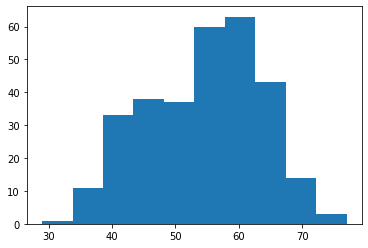

In [44]:
plt.hist(data['age'])

# 5 Определение пола, у представителей которого выше доля больных (% с target == 1)

In [71]:
illBothList = data[data['target']==1]
ill_0_List = illBothList[illBothList['sex']==0]['target']
ill_1_List = illBothList[illBothList['sex']==1]['target']
'Всего больных - ' + str(illBothList['target'].shape[0]) + '   ' + 'Больных "Ж" ("0") - ' + str(ill_0_List.shape[0]) + ' (' + str(round(100*ill_0_List.shape[0]/illBothList.shape[0],1)) + '%)    ' + 'Больных "М" ("1") - ' + str(ill_1_List.shape[0]) + ' (' + str(round(100*ill_1_List.shape[0]/illBothList.shape[0],1)) + '%)'

'Всего больных - 165   Больных "Ж" ("0") - 72 (43.6%)    Больных "М" ("1") - 93 (56.4%)'

# Экспорт статистики в документ формата MS Excel

In [15]:
ddesc.to_excel('excel-stat-export.xlsx')